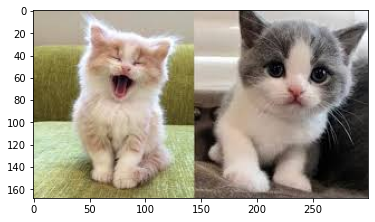

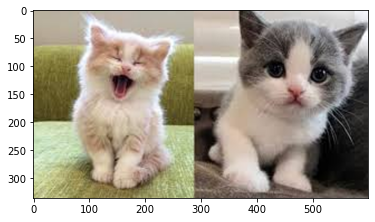

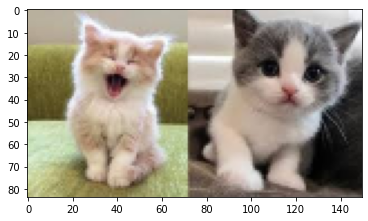

In [3]:
#이미지 크기 조절

#cv2.resize(image, dsize, fx, fy, imterpolation)

#dsize : Manual size
#fx : 가로 비율
#fy : 세로 비율
#interpolation : 보간법(사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미)
#INTER_CUBIC : 사이즈를 크게 할 때 주로 사용
#INTER_AREA : 사이즈를 작게 할 때 주로 사용

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(image, None, fx=0.5, fy= 0.5, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

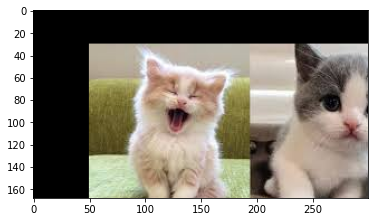

In [7]:
#이미지 위치 변경

#cv2.warpAffine(image, M, dsize)
#M : 변환 행렬
#dsize : Manual size

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')

#행과 열 정보만 저장합니다
height, width = image.shape[:2]

M = np.float32([[1, 0, 50], [0, 1, 30]])
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

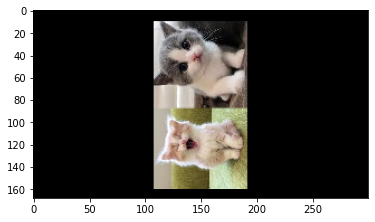

[[ 3.061617e-17  5.000000e-01  1.080000e+02]
 [-5.000000e-01  3.061617e-17  1.590000e+02]]


In [10]:
#이미지 회전

#cv2.getRotationMatrix2D(center, angle, scale)
#center : 회전중심
#angle : 회전각도
#scale : Scale Factor

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')

#행과 열 정보만 저장합니다
height, width =  image.shape[:2]

M = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()
print(M)


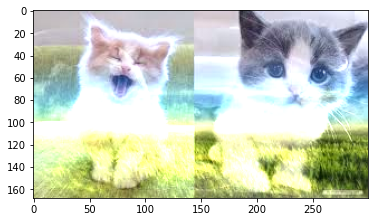

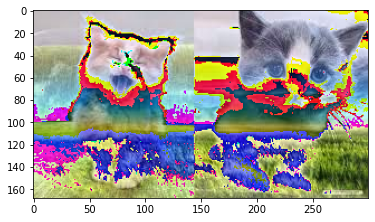

In [12]:
#이미지 합치기

import cv2
import matplotlib.pyplot as plt

image_1 = cv2.imread('cat.jpg')
image_2 = cv2.imread('scale.jpg')

result = cv2.add(image_1, image_2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

result = image_1 + image_2
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

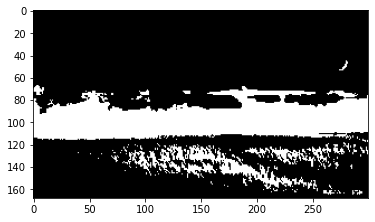

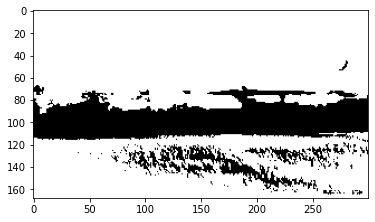

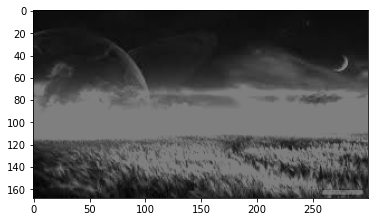

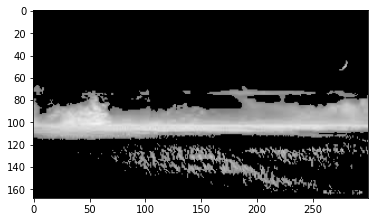

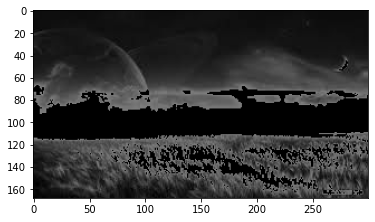

In [4]:
# 임계점 처리하기

#cv2.threshold(image, thresh, max_value, type)

#image : 처리할 Gray Scale 이미지지
#thresh : 임계 값(전체 픽셀에 적용)
#max_value : 임계 값을 넘었을 때 적용할 값
#type : 임계점을 처리하는 방식
#THRESH_BINARY : 임계 값보다 크면 max_value, 작으면 0
#THRESH_BINARY_INV : 임계 값보다 작으면 max_value, zmaus 0
#THERSH_TRUNC : 임계 값보다 크면 임계 값, 작으면 그대로
#THRESH_TOZERO : 임계 값보다 크면 그대로, 작으면 0
#THERSH_TOZERO_INV : 임계 값보다 크면 0, 작으면 그대로로

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('Scale.jpg', cv2.IMREAD_GRAYSCALE)

images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()

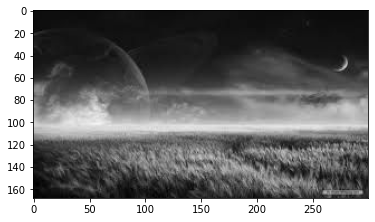

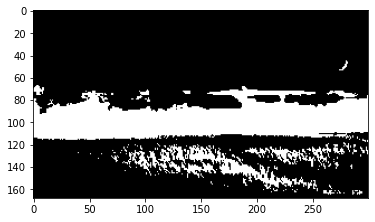

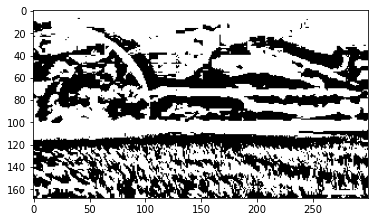

In [5]:
#적응 임계점 처리(하나의 이미지에 다수의 조명 상태가 존재하는 경우)

#cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)

#max_value : 임계 값을 넘었을 때 적용할 값
#adaptive_method : 임계 값을 결정하는 계싼 방법
#ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정
#ADAPTIVE_THRESH_GAUSSIAN_C
#type : 임계점을 처리하는 방식
#block_size : 임계 값을 적용할 영역의 크기
#C : 평균이나 가중 평균에서 차감할 값

import cv2

image = cv2.imread('scale.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()


In [7]:
#Tracker 사용 방법

#cv2.crateTrackbar(track_bar_name, window_name, value, count, on_change)

#value : 초기 값
#count : Max 값(MIn : 0)
#on_change : 값이 변경될 때 호출되는 Callback 함수

import cv2
import numpy as np

def change_color(x):
    r = cv2.getTrackbarPos("R", "Image")
    g = cv2.getTrackbarPos("G", "Image")
    b = cv2.getTrackbarPos("B", "Image")
    image[:] = [b, g, r]
    cv2.imshow("Image", image)

image = np.zeros((600, 400, 3), np.uint8)
cv2.namedWindow("Image")

cv2.createTrackbar("R", "Image", 0, 255, change_color)
cv2.createTrackbar("G", "Image", 0, 255, change_color)
cv2.createTrackbar("B", "Image", 0, 255, change_color)

cv2.imshow("Image", image)
cv2.waitKey(0)

-1